In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

### Generate a time series from IID Gaussian random process

In [2]:
mu, sigma = 0, 1
size = 10000
iid_gaussian_series = np.random.normal(mu, sigma, size)

Run the ADF test on the IID Gaussian series.\
It should reject the hypothesis that the series has unit root and is not stationary

In [3]:
adf_result = adfuller(iid_gaussian_series)
print(adf_result)
print("ADF statistic: {}".format(adf_result[0]))

if adf_result[0] < adf_result[4]['1%']:
    print("The series is stationary with significance level at 1%")

(-98.94150078193981, 0.0, 0, 9999, {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}, 28490.731113792808)
ADF statistic: -98.94150078193981
The series is stationary with significance level at 1%


#### Run ADF test on the cumsum of Gaussian IID

Compute the first differentation and run ADF test

In [4]:
order = 0
significance_level = "1%"
gaussian_series_cumsum = np.cumsum(iid_gaussian_series)
series_diff = gaussian_series_cumsum
while True:
    adf_test = adfuller(series_diff)
    print("ADF statistic is {}, and critical values are {}".format(adf_test[0], adf_test[4]))
    if adf_test[0] < adf_test[4][significance_level]:
        print("This series has the order integration of {} with significance level at {}".format(order, significance_level))
        break
    series_diff = np.diff(series_diff)
    order += 1

ADF statistic is -1.6800714652228017, and critical values are {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}
ADF statistic is -98.95536709719418, and critical values are {'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}
This series has the order integration of 1 with significance level at 1%


In [5]:
adf_cumsum = adfuller(gaussian_series_cumsum)
print("p-value of ADF on the cumsum series is {:.2f}".format(adf_cumsum[1]))

p-value of ADF on the cumsum series is 0.44


Differentiate the cumsum series twice and run ADF test to get the p-value

In [7]:
adf_cumsum_diff_twice = adfuller(np.diff(np.diff(gaussian_series_cumsum)))
print("p-value of ADF on the diff-twice cumsum is {:.2f}".format(adf_cumsum_diff_twice[1]))

p-value of ADF on the diff-twice cumsum is 0.00


### Time series follows a sinusoidal function

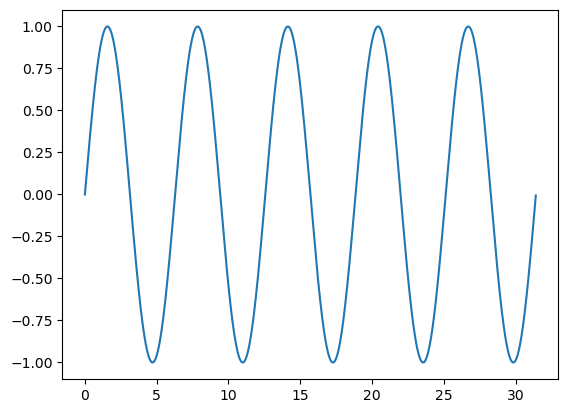

In [16]:
step = 0.01
cycle = 10
x_values = np.arange(0, cycle * np.pi, step)
y_values = np.sin(x_values)
plt.plot(x_values, y_values)

In [18]:
sin_adf = adfuller(y_values)
print(sin_adf)
print("The p-value of the sinusoidal function is {}".format(sin_adf[1]))

(-2367566588027.452, 0.0, 1, 3140, {'1%': -3.432434284686715, '5%': -2.86246090842951, '10%': -2.5672602212057285}, -202900.55022779622)
The p-value of the sinusoidal function is 0.0


Shift every observation with the same positive value, then compute the cumsum

In [20]:
shifted_val = 0.1
cumsum_shifted_sin = np.cumsum(y_values + shifted_val)
shifted_adf = adfuller(cumsum_shifted_sin)
print(shifted_adf)
print("The p-value of the cumsum of shifted sinusoidal function is {}".format(shifted_adf[1]))

(17.532169199683036, 1.0, 23, 3118, {'1%': -3.4324490031269144, '5%': -2.862467409249606, '10%': -2.567263682135347}, -189682.47358694015)
The p-value of the cumsum of shifted sinusoidal function is 1.0


Apply an expanding window fracdiff with tau = 1e-2

In [ ]:
tau = 1e-2